In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.datasets.mnist import load_data

In [ ]:
(trainX, trainY), (testX, testY) = load_data()

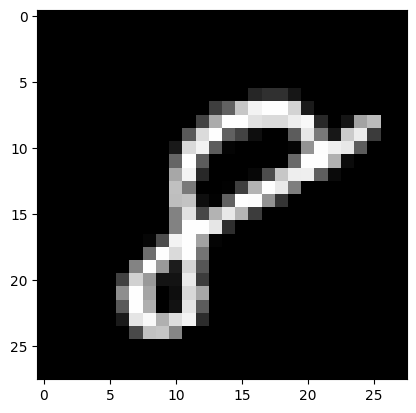

In [ ]:
plt.imshow(trainX[-1], cmap = 'gray')

In [ ]:
trainX = torch.from_numpy(trainX).type(torch.float)
trainX = trainX.reshape(trainX.shape[0],784)  #here we have an MLP and we are expecting 1D data and therefore we need to convert it into a 1D vector
trainX = trainX - 127.5
trainX = trainX/127.5

testX = torch.from_numpy(testX).type(torch.float)
testX = testX.reshape(testX.shape[0],784)  #here we have an MLP and we are expecting 1D data and therefore we need to convert it into a 1D vector
testX = testX - 127.5
testX = testX/127.5

In [ ]:
class NeuralNetwork(nn.Module) :
  def __init__(self, in_dim, hidden_dim, out_dim) :
    super(NeuralNetwork, self).__init__()

    self.network = nn.Sequential(nn.Linear(in_dim, hidden_dim), nn.Tanh(), nn.Linear(hidden_dim, out_dim), nn.Tanh())

  def forward(self, x) :
    return self.network(x)

In [ ]:
encoder = NeuralNetwork(784,16,200)
decoder = NeuralNetwork(200,16,784)


In [ ]:
def sample_batch(batch_size) :
  indicex = torch.randperm(trainX.shape[0])[:batch_size]
  return trainX[indicex ]

In [ ]:
def train(encoder, decoder,encoder_optimizer, decoder_optimizer, nb_epochs = 1000, batch_size = 128, device = 'cpu') :
  training_loss = []
  for epoch in tqdm(range(nb_epochs)) :
    img_batch = sample_batch(batch_size).to(device)
    z = encoder(img_batch)
    reconstructed_img = decoder(z)

    loss = ((img_batch - reconstructed_img)**2).mean()
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()
    loss.backward()
    encoder_optimizer.step()
    decoder_optimizer.step()

    training_loss.append(loss.item())
  return training_loss

In [ ]:
encoder = NeuralNetwork(784,16,200)
decoder = NeuralNetwork(200,16,784)


device = 'cpu'
encoder.to(device)
decoder.to(device)

NeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=200, out_features=200, bias=True)
    (1): Tanh()
    (2): Linear(in_features=200, out_features=784, bias=True)
    (3): Tanh()
  )
)

In [ ]:
encoder_optimizer = torch.optim.Adam(encoder.parameters(), lr = 1e-4)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr = 1e-4)

In [ ]:
training_loss = train(encoder, decoder, encoder_optimizer, decoder_optimizer, nb_epochs = 10000, batch_size = 128, device = device)

100%|██████████| 10000/10000 [00:40<00:00, 249.12it/s]


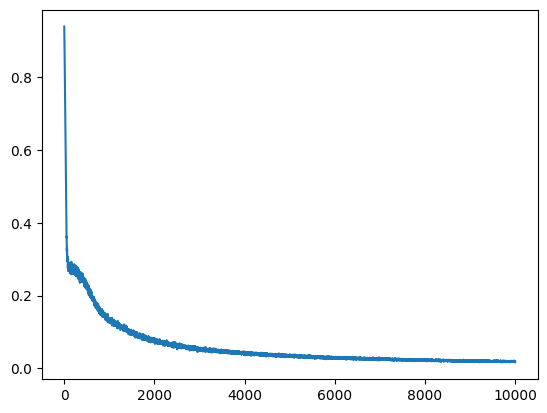

In [ ]:
plt.plot(training_loss)

In [ ]:
training_loss[-1]

0.019106276333332062

In [ ]:
img = testX[0].to(device)
z = encoder(img)
reconstructed_img = decoder(z)

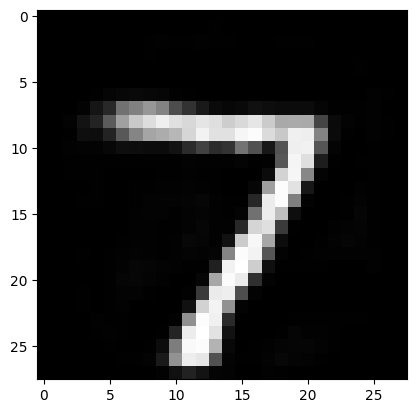

In [ ]:
plt.imshow(reconstructed_img.cpu().data.numpy().reshape(28,28), cmap = 'gray')

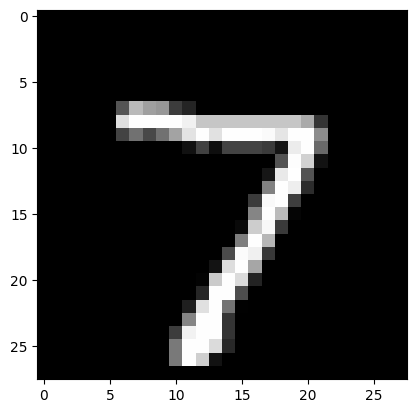

In [ ]:
plt.imshow(img.cpu().data.numpy().reshape(28,28), cmap = 'gray')

In [ ]:
z.data  #this will show that in the latent space we have a four dimensional object

tensor([ 0.4621, -0.5481, -0.0139, -0.0331,  0.1962, -0.3964, -0.6089, -0.0885,
        -0.0395, -0.5056,  0.6452, -0.3625, -0.6462,  0.1293,  0.1585, -0.5485,
        -0.3037,  0.4422,  0.3793, -0.2596,  0.1640,  0.4257,  0.1286,  0.0940,
         0.6800,  0.3357, -0.3925, -0.5593,  0.2506,  0.1457, -0.3261,  0.3131,
         0.1112, -0.2397, -0.3321, -0.4366,  0.3122, -0.1166,  0.4949,  0.1447,
        -0.0225,  0.0545,  0.3890, -0.3090,  0.6136,  0.4893,  0.5716,  0.0593,
        -0.2793,  0.1542, -0.4192, -0.3918,  0.2467,  0.6032,  0.0827, -0.2474,
         0.2927, -0.3979,  0.0579, -0.1026,  0.7106,  0.1749, -0.4398,  0.5020,
         0.3544, -0.2818, -0.3317, -0.3357,  0.0440, -0.0967,  0.4013, -0.1038,
         0.1648, -0.3691, -0.2428,  0.1407, -0.4873,  0.4445,  0.1870,  0.3175,
         0.0947, -0.4921,  0.5400, -0.6080, -0.7192,  0.6197, -0.4475,  0.2257,
         0.2825, -0.6706,  0.4597,  0.5385,  0.6842, -0.0648,  0.2916, -0.2910,
         0.2473,  0.2061,  0.2013,  0.14

In [ ]:
decoder

NeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=200, out_features=200, bias=True)
    (1): Tanh()
    (2): Linear(in_features=200, out_features=784, bias=True)
    (3): Tanh()
  )
)

In [ ]:
#So what is happening is we can use the key features found by the encoder to generate new images via the decoder ?

In [ ]:
print(img.min())
print(img.max())

tensor(-1., device='cuda:0')
tensor(1., device='cuda:0')


In [ ]:
print(reconstructed_img.min())
print(reconstructed_img.max())

tensor(-0.9998, device='cuda:0', grad_fn=<MinBackward1>)
tensor(0.9684, device='cuda:0', grad_fn=<MaxBackward1>)


Adding tanh() as the activation helped because now we have the reconstructed image within the range of the input image

In [ ]:
z = encoder(testX.to(device)).data.cpu().numpy()

In [ ]:
print(z.mean())
print(z.std())

0.001912875
0.40106565


In [ ]:
from sklearn.manifold import TSNE

TSNE stands for t Stochastic Neighbourhood Embedding

Why the heck are we doing it ? Because apparently this is a non-linear dimensionality reduction algorithm , somewhat like the PCA

This kind of takes care of stuff like the KL Divergence which we have to deal with in VAEs

I guess we can use it for the Swiss Roll dataset, but I am still getting familiar with this stuff and am not super confident of how to proceed

In [ ]:
tsne = TSNE(n_components = 2 , random_state = 0)

In [ ]:
z_emb = tsne.fit_transform(z)

<Axes: >

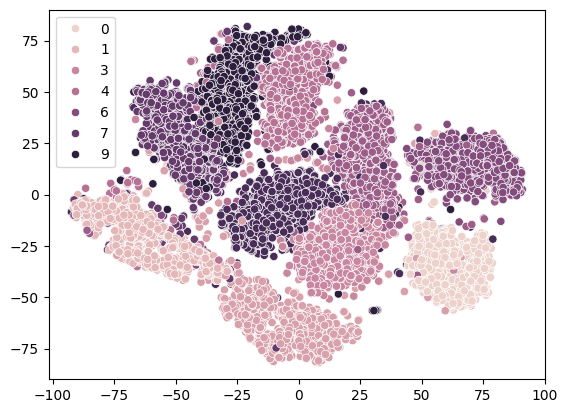

In [ ]:
import seaborn as sns
sns.scatterplot(x = z_emb[:, 0], y= z_emb[:, 1], hue = testY)

This, essentially, is latent space interpolation